## Seung Jun Choi in Urban Information Lab
### Model Evaluation

In [2]:
import sys
import numpy as np

print(f"Python version: {sys.version}")
print(f"NumPy version: {np.__version__}")

Python version: 3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:09:21) [Clang 14.0.6 ]
NumPy version: 2.3.2


In [ ]:
# If you haven't downloaded sklearn...
!pip install scikit-learn

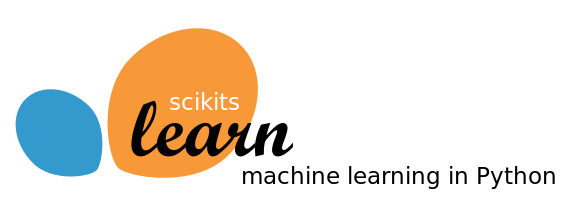

In [6]:
import sklearn

print(sklearn.__version__)

1.7.1


### How to evaluate your models?

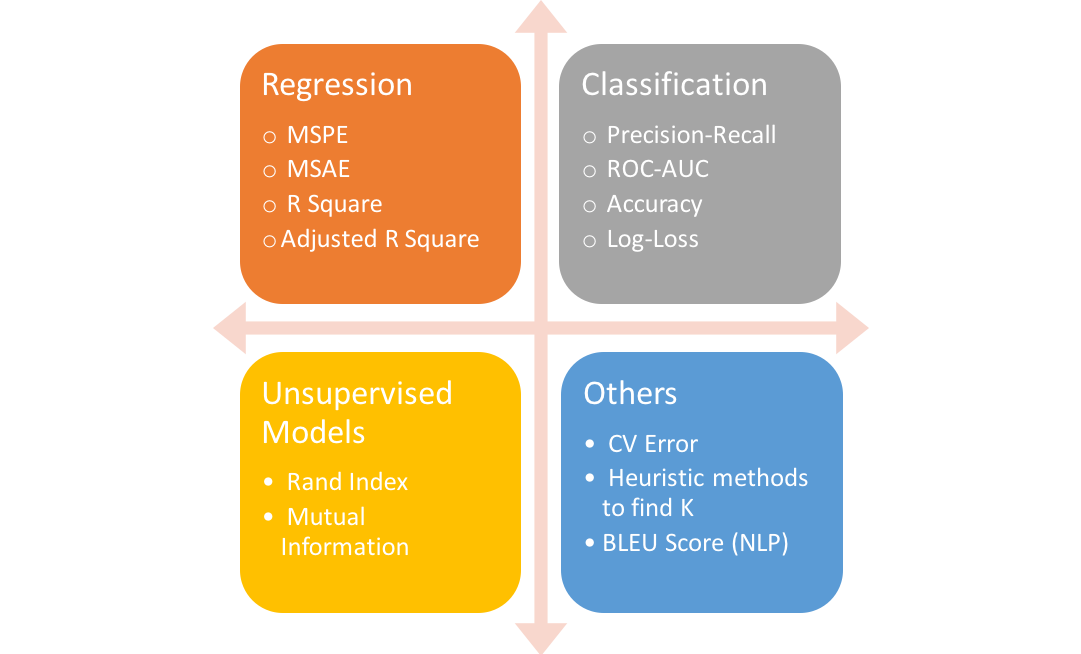

### Regression Model Evaluation is easier than Other Model Evaluation (It is also more intuitive)

Because all you have to do is calculate the loss of model's prediction to real or validation data

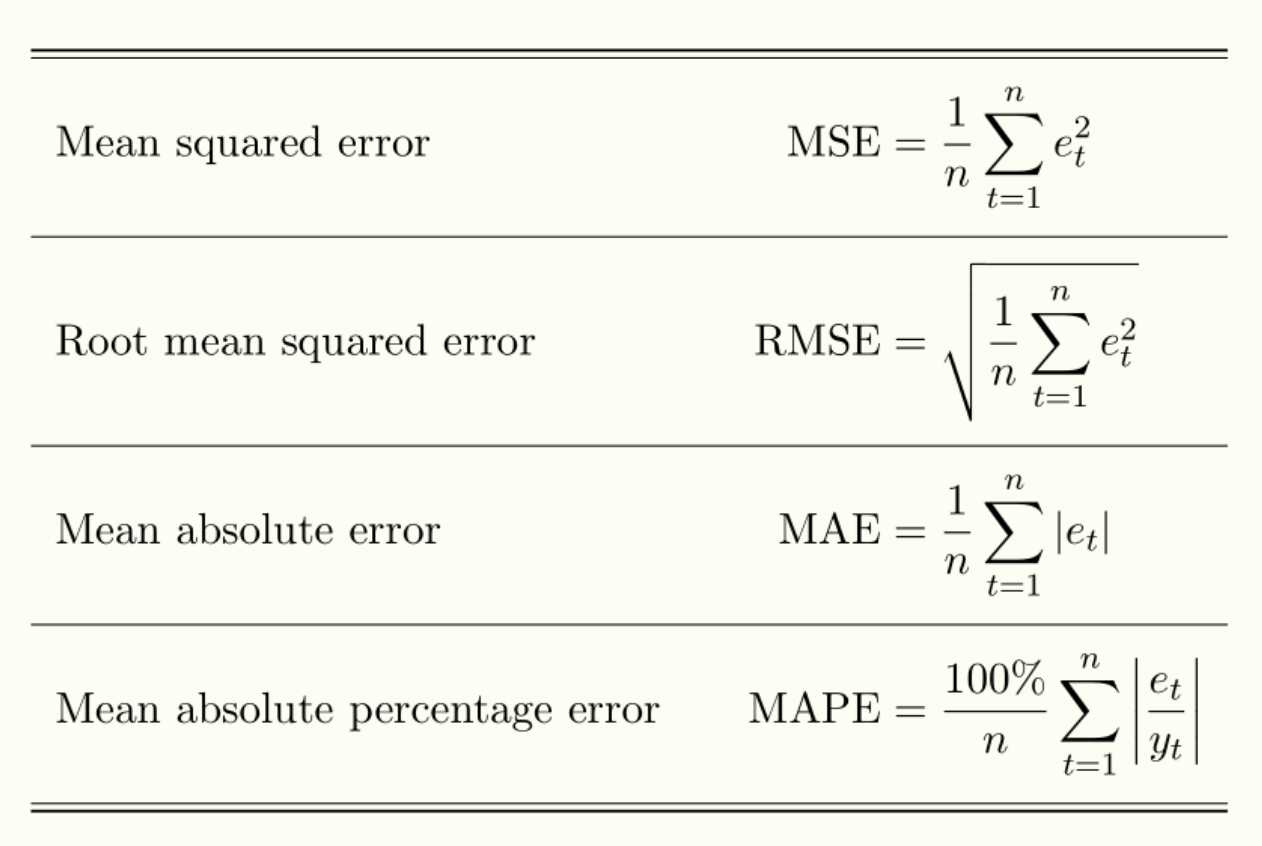

### Here we will focus more on Classification Model Evaluation

#### Import BaseEstimator from sklearn. 
#### BaseEstimator help you create Customized dummy Classifier Classes
#### We use fit() to train model; however, in BaseEstimator fit doesn't really mean anything

In [10]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
     #The model here is just prediction the sex; which is classified into binary dummy (1 vs 0)
    def fit(self, X , y=None):
        pass
    

    #If the value of the sex feature is 1 , it would return 0 if not it would return 1 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred


We will use the created BaseEstimator for modelling classifier model

Here I will be using titanic sample data which is downloadable in Kaggle

# Preprocessing Data

In [ ]:
#Install pandas incase you do not have it
!pip install pandas

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Prepross null values
def fillna(df):
    df = df.fillna({
    'Age': df['Age'].mean(),
    'Cabin': 'N',
    'Embarked': 'N',
    'Fare': 0
    })
    return df

# delete features not in need
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# labeling the strings to numeric dummies
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# calling out the features transformation functions that I have previously defined
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 1. First let's look at Accuracy of your model

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# calling out the data, preprocessing data, and training and spliting your model
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# using the dummyclassifier model I have made above
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier Accuaracy is" : {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier Accuaracy is" : 0.7877


## What is Accuracy?

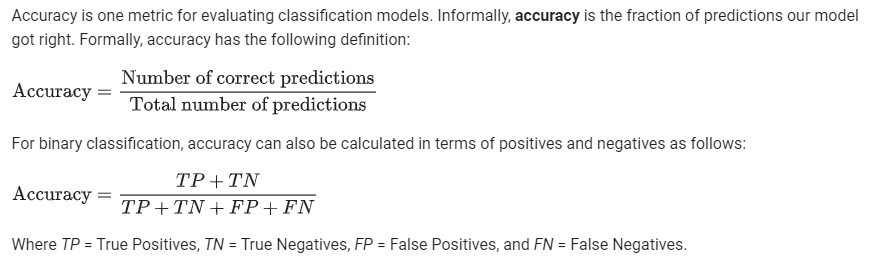

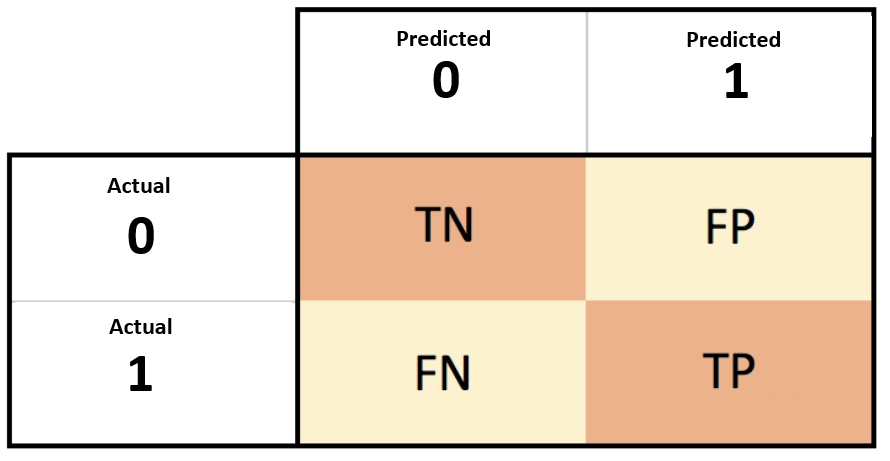

### There other indicators we use

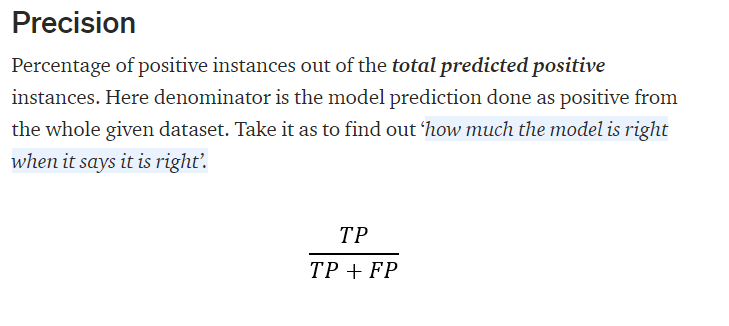

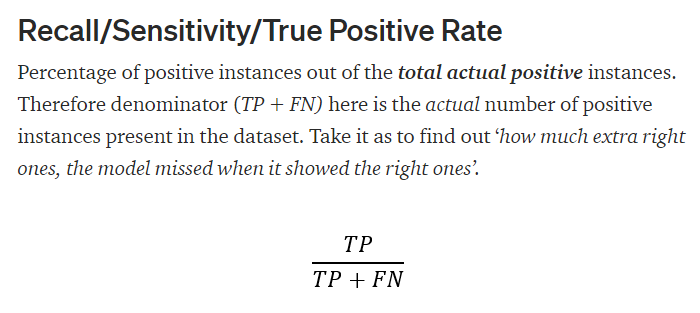

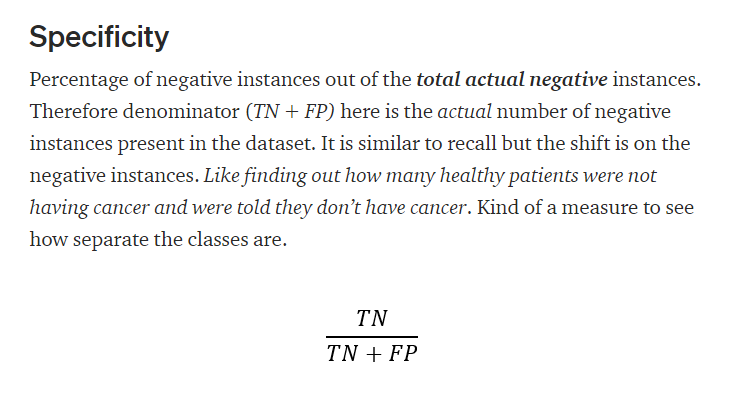

### Chossing the evaluation score depends on your research objective. For instance if you modelling cancer classification risk of doing false negative is higher than doing false positive; meaning model identifying even though you have cancer and not capturing it is riskier

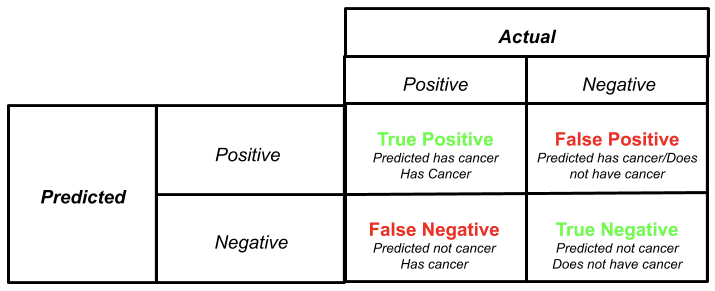

### In this case Recall is more significant indicator than precision (Positive > Negative)

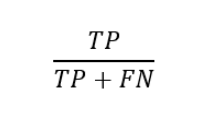

## Decent model is having higher score in both recall and precision score; however they are actually in tradeoff

# 2. Let's get both precision & recall

### I'm going to define some functions for convenience

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [20]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("Precision:", precision_score(y_test, fakepred))
print("Recall:", recall_score(y_test, fakepred))

## Below is the code to get all confusion matrix (accuracy / precision / recall )

In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy , precision ,recall))

#### I'm going to use titanic data from kaggle

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# Because dependent variable is binary; I'm using logisticregression
from sklearn.linear_model import LogisticRegression

# reload, preprocess
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

In [ ]:
#install matplotlib incase you do not have it
!pip install matplotlib


And as I said the precision and recall score are in trade-off

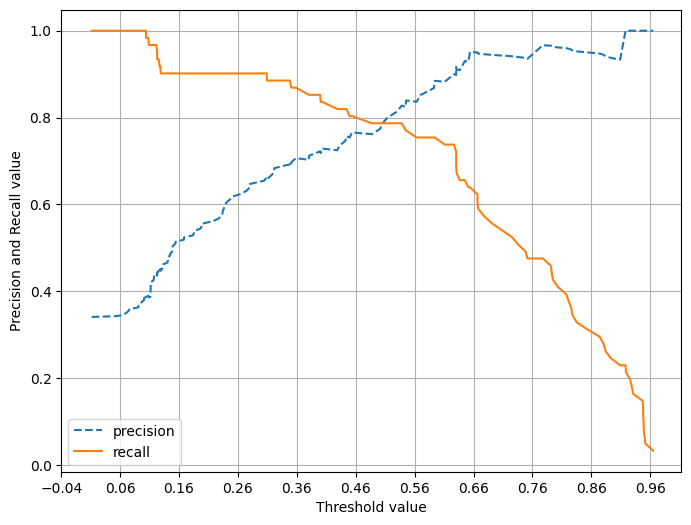

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # get precision and recall ndarray per thresholds
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # Set X-axis as thresholds; Y-axis for Precision & Recall 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # Plot X-axis in 0.1 interval
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # xSetting label, legend, and grid
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


## 1) Method to incrase your precision
#### Strengthen your positive index. For instance, only diagnose cancer when you are 100% sure (older than 80, obesitiy, cancer cell size in 99% percentile). Precision equation is TP / (TP + FP). So if you get only one positive patient the score became 100%

## 2) Method to increase your recall
#### Diagnoe every patients as positive beacuse TN is not included in the matrix and FN is 0. Either way your score become 100%

## But of course everything should be balanced...

# 3. F1 Score: Mixture of Precision & Recall

In [29]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 Score: {0:.4f}'.format(f1))

F1 Score: 0.7805


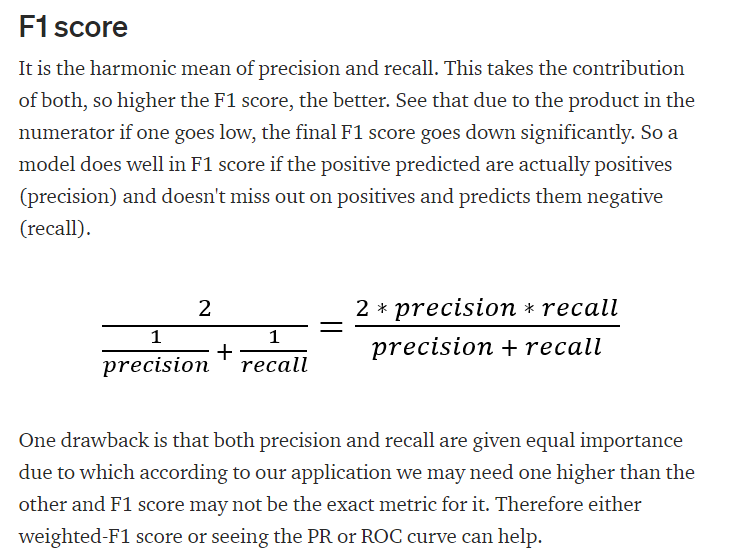

In [30]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # Adding F1 Score
    f1 = f1_score(y_test,pred)
    print('Confusion Matrix')
    print(confusion)
    # f1 score print 
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
from sklearn.preprocessing import Binarizer
    
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('thresholds:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


thresholds: 0.4
Confusion Matrix
[[98 20]
 [10 51]]
Accuracy: 0.8324, Precision: 0.7183, Recall: 0.8361, F1:0.7727
thresholds: 0.45
Confusion Matrix
[[103  15]
 [ 12  49]]
Accuracy: 0.8492, Precision: 0.7656, Recall: 0.8033, F1:0.7840
thresholds: 0.5
Confusion Matrix
[[104  14]
 [ 13  48]]
Accuracy: 0.8492, Precision: 0.7742, Recall: 0.7869, F1:0.7805
thresholds: 0.55
Confusion Matrix
[[109   9]
 [ 15  46]]
Accuracy: 0.8659, Precision: 0.8364, Recall: 0.7541, F1:0.7931
thresholds: 0.6
Confusion Matrix
[[112   6]
 [ 16  45]]
Accuracy: 0.8771, Precision: 0.8824, Recall: 0.7377, F1:0.8036


#### thresholds 0.6; the F1 score is at the highest; however, do note that recall score is lacking behind than other thresholds

## Lastly. ROC Curve

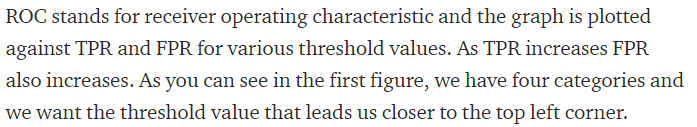

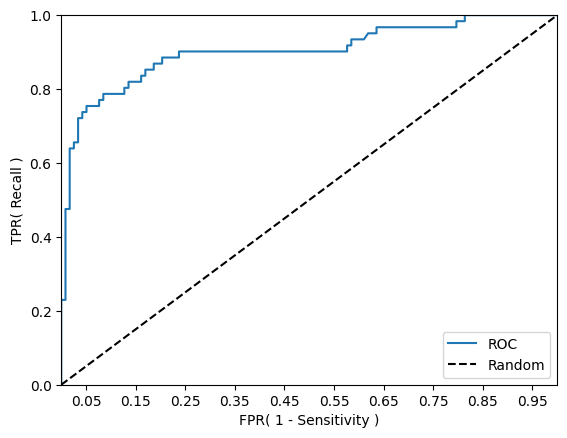

In [32]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # calculate TPR, FPR per thresholds
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # Plot data
    plt.plot(fprs , tprs, label='ROC')
    # Linear line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # legend
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


## You can actually calcuate the area (AUC)

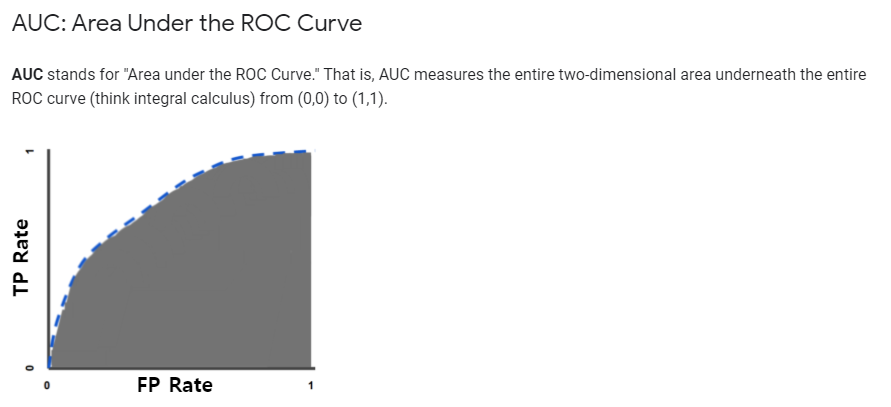

In [34]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC value: {0:.4f}'.format(roc_score))

ROC AUC value: 0.9024


### There is also something called PR Curve

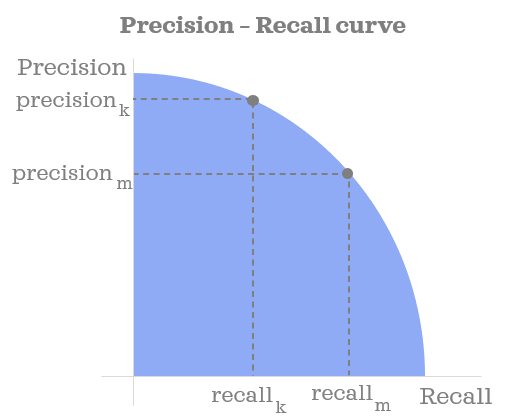

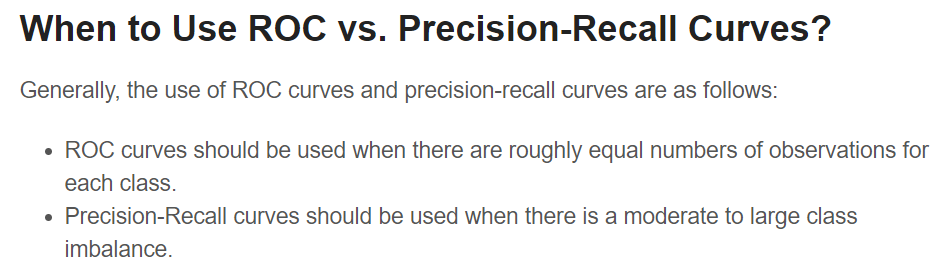

## How should I calculate PR AUC? 

### Well, I'll leave it as a homework

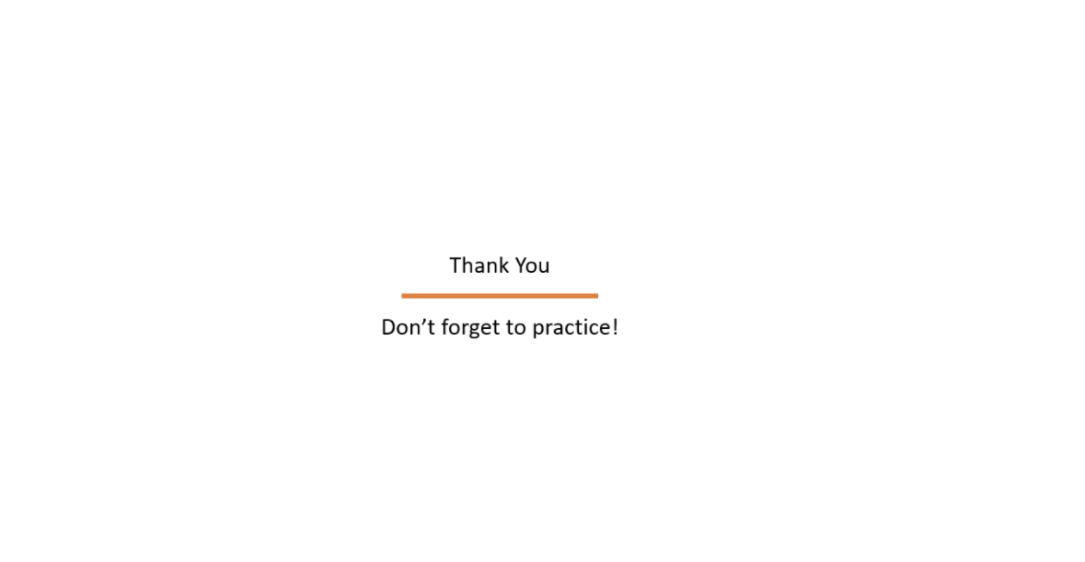